<a href="https://colab.research.google.com/github/AryaWiratama26/linreg-ml/blob/main/Project_Machine_Learning_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Baca Dataset
df = pd.read_csv('/content/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [73]:
# Cek data kosong
print(df.isnull().sum()) # Karena tidak ada data kosong kita lanjut ke langkah berikutnya

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


In [74]:
# Membuang duplikat
print(df.duplicated().sum())
# Jika ada bisa lakukan ini
# df = df.drop_duplicates()
# df.drop_duplicates(inplace=True)

0


In [75]:
# Statistik deskriptif
print(df.describe())

       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000


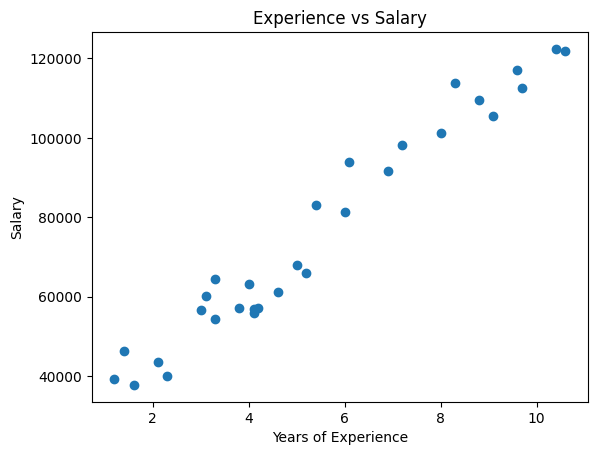

In [76]:
# Visulisasi Relasi
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()

In [77]:
# Split Data train dan data test
from sklearn.model_selection import train_test_split

X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Latih
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)


[9423.81532303]
24380.201479473704


In [79]:
# Evaluasi Model

from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 49830096.855908394
R² Score: 0.9024461774180497


In [80]:
years = [[5]]  # misal 5 tahun pengalaman
predicted_salary = model.predict(years)
print("Prediksi Gaji untuk 5 tahun pengalaman:", predicted_salary[0])


Prediksi Gaji untuk 5 tahun pengalaman: 71499.2780946286


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'Salary')

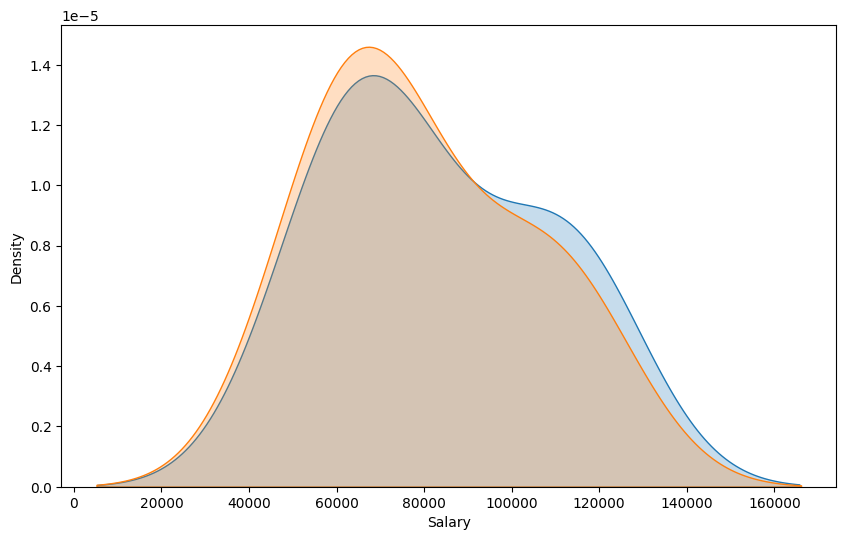

In [81]:
# Plotting actual and predict
plt.figure(figsize=(10,6))

sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(y_pred, label='Predicted', fill=True)

plt.xlabel('Salary')